<center>
<img src="../../img/ml_theme.png">
# Дополнительное профессиональное <br> образование НИУ ВШЭ
#### Программа "Практический анализ данных и машинное обучение"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: преподаватель Факультета Компьютерных Наук ВШЭ <br> Кашницкий Юрий
</center>
Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Занятие 1. Библиотеки и инструменты для анализа данных. Математика в машинном обучении</center>
## <center>Часть 1. Обзор библиотеки Pandas</center>

**Pandas** - это библиотека Python, предоставляющая широкие возможности для анализа данных. С ее помощью очень удобно загружать, обрабатывать и анализировать табличные данные с помощью SQL-подобных запросов. В связке с библиотеками Matplotlib и Seaborn появляется возможность удобного визуального анализа табличных данных.

In [1]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
%pylab inline
#import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


Основными структурами данных в Pandas являются классы Series и DataFrame. Первый из них представляет собой одномерный индексированный массив данных некоторого фиксированного типа. Второй - это двухмерная структура данных, представляющая собой таблицу, каждый столбец которой содержит данные одного типа. Можно представлять её как словарь объектов типа Series. Структура DataFrame отлично подходит для представления реальных данных: строки соответствуют признаковым описаниям отдельных объектов, а столбцы соответствуют признакам.

Для начала рассмотрим простые примеры создания таких объектов и возможных операций над ними.

### Series

** Создание объекта Series из 5 элементов, индексированных буквами:**

In [2]:
salaries = pd.Series([400, 300, 200, 250], 
              index = ['Andrew', 'Bob', 
                       'Charles', 'Ann']) 
print(salaries)                                                                 

Andrew     400
Bob        300
Charles    200
Ann        250
dtype: int64


In [3]:
salaries[salaries > 250]

Andrew    400
Bob       300
dtype: int64

**Индексирование возможно в виде s.Name или s['Name'].**

In [4]:
print(salaries.Andrew == salaries['Andrew']) 

True


In [5]:
salaries['Carl'] = np.nan

In [6]:
salaries.fillna(salaries.median(), inplace=True)

In [7]:
salaries

Andrew     400.0
Bob        300.0
Charles    200.0
Ann        250.0
Carl       275.0
dtype: float64

**Series поддерживает пропуски в данных.**

In [8]:
salaries.c = np.nan # Series can contain missing values
print(salaries)

Andrew     400.0
Bob        300.0
Charles    200.0
Ann        250.0
Carl       275.0
dtype: float64


**Объекты Series похожи на ndarray и могут быть переданы в качестве аргументов большинству функций из Numpy.**

In [9]:
print('Second element of salaries is', salaries[1], '\n')
# Smart indexing
print(salaries[:3], '\n')
print('There are', len(salaries[salaries > 0]), 'positive elements in salaries\n')
# Series obects can be the arguments for Numpy functions
print(np.exp(salaries))

Second element of salaries is 300.0 

Andrew     400.0
Bob        300.0
Charles    200.0
dtype: float64 

There are 5 positive elements in salaries

Andrew     5.221470e+173
Bob        1.942426e+130
Charles     7.225974e+86
Ann        3.746455e+108
Carl       2.697631e+119
dtype: float64


### DataFrame

### Создание и изменение

**Перейдём к рассмотрению объектов типа DataFrame. Такой объект можно создать из массива numpy, указав названия строк и столбцов.**

In [10]:
df1 = pd.DataFrame(np.random.randn(5, 3), 
                   index=['o1', 'o2', 'o3', 'o4', 'o5'], 
                   columns=['f1', 'f2', 'f3'])
df1

,f1,f2,f3
o1,0.098805,0.050115,0.629009
o2,1.300237,-1.117722,0.661967
o3,-0.678927,0.494115,0.532970
o4,1.031354,0.227453,0.103453
o5,-1.284564,0.380524,-0.255337


**Альтернативным способом является создание DataFrame из словаря numpy массивов или списков.**

In [11]:
df2 = pd.DataFrame({'A': np.random.random(5), 
                    'B': ['a', 'b', 'c', 'd', 'e'], 
                    'C': np.arange(5) > 2})
df2

,A,B,C
0,0.038496,a,False
1,0.477317,b,False
2,0.536338,c,False
3,0.759818,d,True
4,0.186279,e,True


**Обращение к элементам (или целым кускам фрейма):**

In [12]:
print('The element in position 3, B is', df2.at[3, 'B'], '\n')
print(df2.loc[[1, 4], ['A', 'B']])

The element in position 3, B is d 

          A  B
1  0.477317  b
4  0.186279  e


**Изменение элементов и добавление новых:**

In [13]:
df2.at[2, 'B'] = 'f'
df2

,A,B,C
0,0.038496,a,False
1,0.477317,b,False
2,0.536338,f,False
3,0.759818,d,True
4,0.186279,e,True


In [14]:
df2.loc[5] = [3.1415, 'c', False]
df2

,A,B,C
0,0.038496,a,False
1,0.477317,b,False
2,0.536338,f,False
3,0.759818,d,True
4,0.186279,e,True
5,3.141500,c,False


In [15]:
df1.columns = ['A', 'B', 'C']
df3 = df1.append(df2)
df3

,A,B,C
o1,0.098805,0.0501152,0.629009
o2,1.300237,-1.11772,0.661967
o3,-0.678927,0.494115,0.532970
o4,1.031354,0.227453,0.103453
o5,-1.284564,0.380524,-0.255337
0,0.038496,a,0.000000
1,0.477317,b,0.000000
2,0.536338,f,0.000000
3,0.759818,d,1.000000
4,0.186279,e,1.000000


#### Обработка пропущенных значений

In [16]:
df1.at['o2', 'A'] = np.nan
df1.at['o4', 'C'] = np.nan
df1

,A,B,C
o1,0.098805,0.050115,0.629009
o2,NaN,-1.117722,0.661967
o3,-0.678927,0.494115,0.532970
o4,1.031354,0.227453,NaN
o5,-1.284564,0.380524,-0.255337


**Булева маска для пропущенных значений (True - там, где был пропуск, иначе - False):**

In [17]:
pd.isnull(df1)

,A,B,C
o1,False,False,False
o2,True,False,False
o3,False,False,False
o4,False,False,True
o5,False,False,False


**Можно удалить все строки, где есть хотя бы один пропуск.**

In [18]:
df1.dropna(how='any')

,A,B,C
o1,0.098805,0.050115,0.629009
o3,-0.678927,0.494115,0.532970
o5,-1.284564,0.380524,-0.255337


**Пропуски можно заменить каким-то значением.**

In [19]:
df1.fillna(0)

,A,B,C
o1,0.098805,0.050115,0.629009
o2,0.000000,-1.117722,0.661967
o3,-0.678927,0.494115,0.532970
o4,1.031354,0.227453,0.000000
o5,-1.284564,0.380524,-0.255337


## Пример первичного анализа данных с Pandas

### Чтение из файла и первичный анализ

Однако на практике DataFrame, с которым нам предстоит работать, необходимо считать из некоторого файла. Рассмотрим работу с DataFrame на примере следующего набора данных. Для каждрого опрошенного имеется следующая информация: заработная плата за час работы, опыт работы, образование, внешняя привлекательность (в баллах от 1 до 5), бинарные признаки: пол, семейное положение, состояние здоровья (хорошее/плохое), членство в профсоюзе, цвет кожи (белый/чёрный), занятость в сфере обслуживания (да/нет).

In [6]:
import pandas as pd

df = pd.read_csv('../../data/beauty.csv', sep=';')

In [11]:
?pd.read_csv

In [13]:
df['wage'].head()

0     5.73
1     4.28
2     7.96
3    11.57
4    11.42
Name: wage, dtype: float64

**Посмотрим на размер данных и названия признаков.**

In [16]:
print(df.shape)
print(df.columns.values)

(1260, 10)
['wage' 'exper' 'union' 'goodhlth' 'black' 'female' 'married' 'service'
 'educ' 'looks']


**При работе с большими объёмами данных бывает удобно посмотреть только на небольшие части фрейма (например, начало).**

In [22]:
df.head(4)

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3


Метод **describe** показывает основные статистические характеристики данных по каждому признаку: число непропущенных значений, среднее, стандартное отклонение, диапазон, медиану, 0.25 и 0.75 квартили.

In [23]:
df.describe()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,18.206349,0.272222,0.933333,0.073810,0.346032,0.691270,0.273810,12.563492,3.185714
std,4.660639,11.963485,0.445280,0.249543,0.261564,0.475892,0.462153,0.446089,2.624489,0.684877
min,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,3.707500,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,3.000000
50%,5.300000,15.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,12.000000,3.000000
75%,7.695000,27.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,13.000000,4.000000
max,77.720000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,5.000000


**DataFrame можно отсортировать по значению какого-нибудь из признаков. В нашем случае, например, по размеру заработной платы.**

In [18]:
df.sort(columns=['female', 'wage'], 
        ascending = [True, False]).head()

/Users/yorko/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,wage,exper,union,goodhlth,black,female,married,service,educ,looks
269,41.67,16,0,0,0,0,1,0,13,4
415,38.86,29,0,1,0,0,1,0,13,3
69,32.79,33,0,1,0,0,1,1,16,4
290,31.09,32,0,0,0,0,1,0,13,3
68,29.98,12,0,1,0,0,1,1,17,3


### Индексация и извлечение данных

DataFrame можно индексировать по-разному. В связи с этим рассмотрим различные способы индексации и извлечения нужных нам данных из DataFrame на примере простых вопросов.

Для извлечения отдельного столбца можно использовать конструкцию вида DataFrame['Name']. Воспользуемся этим для ответа на вопрос: **какова доля людей с хорошим здоровьем среди опрошенных?**

In [20]:
df['goodhlth'].std()

0.24954287038910544

Очень удобной является логическая индексация DataFrame по одному столбцу. Выглядит она следующим образом: df[P(df['Name'])], где P - это некоторое логическое условие, проверяемое для каждого элемента столбца Name. Итогом такой индексации является DataFrame, состоящий только из строк, удовлетворяющих условию P по столбцу Name. Воспользуемся этим для ответа на вопрос: **какова средняя заработная плата среди женщин?**

In [23]:
df[df['female'] == 1].head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
5,3.91,20,0,0,0,1,1,0,12,3
8,5.00,5,0,1,0,1,0,0,16,3


In [26]:
df[df['female'] == 1].head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
5,3.91,20,0,0,0,1,1,0,12,3
8,5.00,5,0,1,0,1,0,0,16,3


In [25]:
print(df[df['female'] == 1]['wage'].mean())
df[df['female'] == 0]['wage'].mean()

4.29935779817


7.3688228155339734

In [26]:
df[(df['goodhlth'] == 1) & 
   (df['female'] == 1)].head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
8,5.00,5,0,1,0,1,0,0,16,3
9,3.89,12,0,1,0,1,0,0,12,3


In [29]:
df[(df['female'] == 0)]['wage'].mean() - \
df[(df['female'] == 1)]['wage'].mean()

3.069465017368837

**Какова максимальная заработная плата среди мужчин, имеющих членство в профсоюзе, и с опытом работы до 10 лет?**

In [30]:
df[(df['female'] == 0) & (df['union'] == 1)  
   & (df['exper'] < 10)]['wage'].max()

12.82

Извлечь строки с конкретными номерами можно с помощью метода **loc**. Это может быть использовано при разбиении выборки на части. Для примера возьмем случайную подвыборку размера 5.

In [33]:
toy_df = pd.DataFrame({'age': [45, 46, 23],
                      'salary': [30, 34, 38]},
                     index=['Mark Hew', 'Ben Afflek', 'Mary Cage'])

In [45]:
toy_df

,age,salary,gender
Mark Hew,45.0,30.0,0.0
Ben Afflek,46.0,34.0,0.0
Mary Cage,23.0,38.0,1.0
Lorry,26.0,30.0,0.0
1,26.0,30.0,0.0


In [47]:
toy_df.ix[1, :]

age       46.0
salary    34.0
gender     0.0
Name: Ben Afflek, dtype: float64

In [38]:
toy_df.ix[1, 1]

34

In [30]:
df.loc[:10, "wage"]

0      5.73
1      4.28
2      7.96
3     11.57
4     11.42
5      3.91
6      8.76
7      7.69
8      5.00
9      3.89
10     3.45
Name: wage, dtype: float64

In [31]:
df.ix[:10, ['exper','female','married']].head()

,exper,female,married
0,30,1,1
1,28,1,1
2,35,1,0
3,38,0,1
4,27,0,1


**Применение функции к каждому столбцу:**

In [48]:
import numpy as np
df.apply(np.mean) 

wage         6.306690
exper       18.206349
union        0.272222
goodhlth     0.933333
black        0.073810
female       0.346032
married      0.691270
service      0.273810
educ        12.563492
looks        3.185714
dtype: float64

In [51]:
def median_wage(gender):
    return df[df['female'] == gender]['wage'].median()


df['Median_wage_by_gender'] =   df['female'].apply(median_wage)

In [53]:
df['wage_diff'] = df['wage'] - df['Median_wage_by_gender'] 

In [55]:
df.head(20)

,wage,exper,union,goodhlth,black,female,married,service,educ,looks,Median_wage_by_gender,wage_diff
0,5.73,30,0,1,0,1,1,1,14,4,3.75,1.98
1,4.28,28,0,1,0,1,1,0,12,3,3.75,0.53
2,7.96,35,0,1,0,1,0,0,10,4,3.75,4.21
3,11.57,38,0,1,0,0,1,1,16,3,6.41,5.16
4,11.42,27,0,1,0,0,1,0,16,3,6.41,5.01
5,3.91,20,0,0,0,1,1,0,12,3,3.75,0.16
6,8.76,12,0,1,0,0,1,0,16,3,6.41,2.35
7,7.69,5,1,1,0,0,0,0,16,4,6.41,1.28
8,5.00,5,0,1,0,1,0,0,16,3,3.75,1.25
9,3.89,12,0,1,0,1,0,0,12,3,3.75,0.14


In [ ]:
df['is_rich'] = df['wage'].apply(lambda wage: 
                                 wage > df['wage'].median())

In [ ]:
def is_rich(wage):
    return wage > df['wage'].median()
df['is_rich'] = df['wage'].apply(is_rich)

**Группирование данных в зависимости от значения признака *looks* и подсчет среднего значения по каждому столбцу в каждой группе.**

In [57]:
df['looks'].unique()

array([4, 3, 2, 5, 1])

In [70]:
for (i, sub_dataframe) in df.groupby('looks'):
    print(i)
    print(sub_dataframe.shape[0])
    print("В выборке {0} человек с рейтингом привлекательности {1}".\
          format(sub_dataframe.shape[0], i))

1
13
В выборке 13 человек с рейтингом привлекательности 1
2
142
В выборке 142 человек с рейтингом привлекательности 2
3
722
В выборке 722 человек с рейтингом привлекательности 3
4
364
В выборке 364 человек с рейтингом привлекательности 4
5
19
В выборке 19 человек с рейтингом привлекательности 5


In [34]:
g = df.groupby('looks') 
for (i, sub_df) in g:
    print(sub_df['wage'].mean(), sub_df['looks'].mean())

4.62153846154 1.0
5.3288028169 2.0
6.50459833795 3.0
6.29934065934 4.0
7.38842105263 5.0


**Обращение к конкретной группе:**

In [35]:
d1 = g.get_group(1)
d1

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
28,8.35,41,0,0,0,0,1,1,16,1
200,3.75,36,0,1,0,0,0,0,12,1
248,10.99,40,0,1,0,0,1,0,12,1
327,1.65,24,0,1,0,1,0,1,13,1
751,7.93,39,1,1,0,0,1,0,12,1
837,5.56,10,0,1,0,0,1,0,13,1
842,7.69,9,1,0,0,0,1,0,12,1
877,2.73,41,0,1,0,0,1,0,8,1
980,2.31,35,1,1,0,0,1,0,5,1
1126,3.46,26,0,1,0,1,0,1,5,1


### Визуализация в Pandas

Метод **scatter_matrix** позволяет визуализировать попарные зависимости между признаками (а также распределение каждого признака на диагонали). Проделаем это для небинарных признаков.

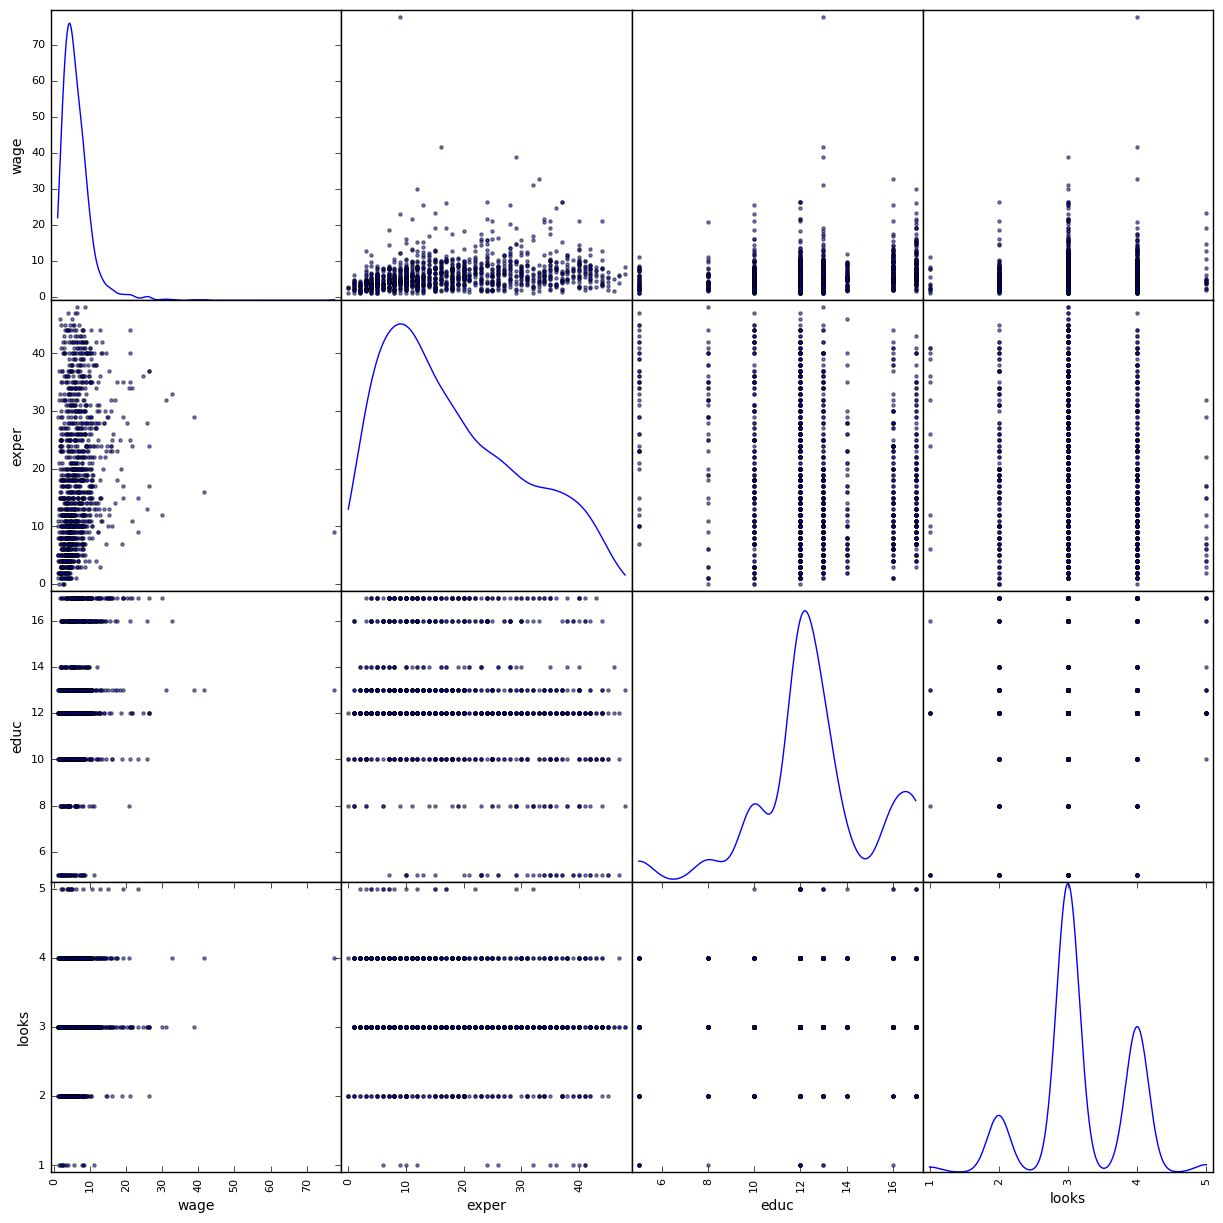

In [36]:
pd.scatter_matrix(df[['wage', 'exper', 'educ', 'looks']], 
                  figsize=(15, 15), diagonal='kde')
plt.show()

**Для каждого признака можно построить отдельную гистограмму:**

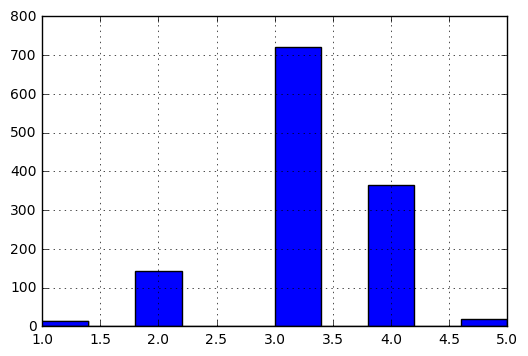

In [37]:
df['looks'].hist()

**Или сразу для всех:**

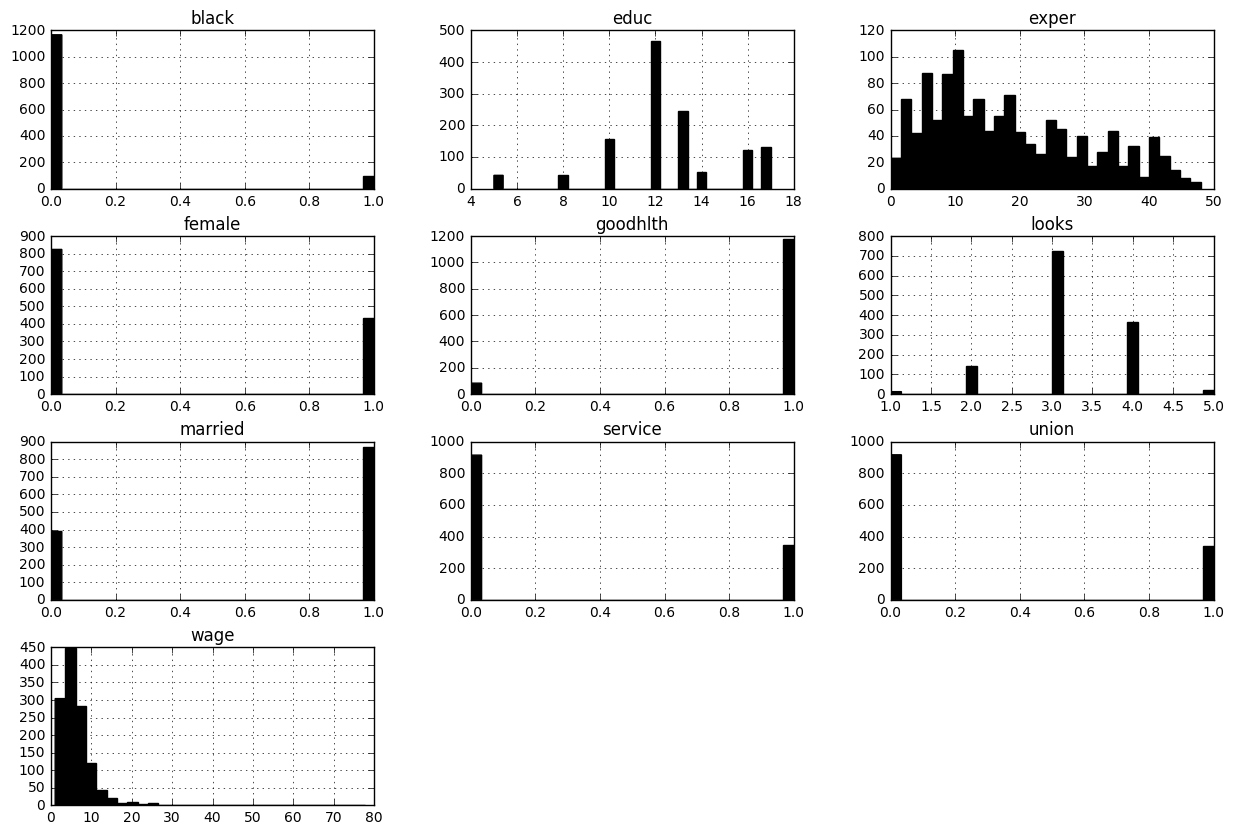

In [38]:
df.hist(color = 'k', bins = 30, figsize=(15,10))
plt.show()

Полезным также является график типа **box plot** ("ящик с усами"). Он позволяет компактно визуализировать основные характеристики (медиану, нижний и верхний квартили, минимальное и максимальное значение, выбросы) распределения признаков.

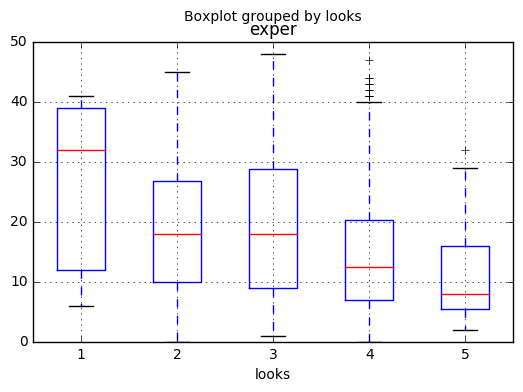

In [39]:
df.boxplot(column='exper', by='looks')
plt.show()

**Можно сделать это, сгруппировав данные по какому-либо другому признаку:**

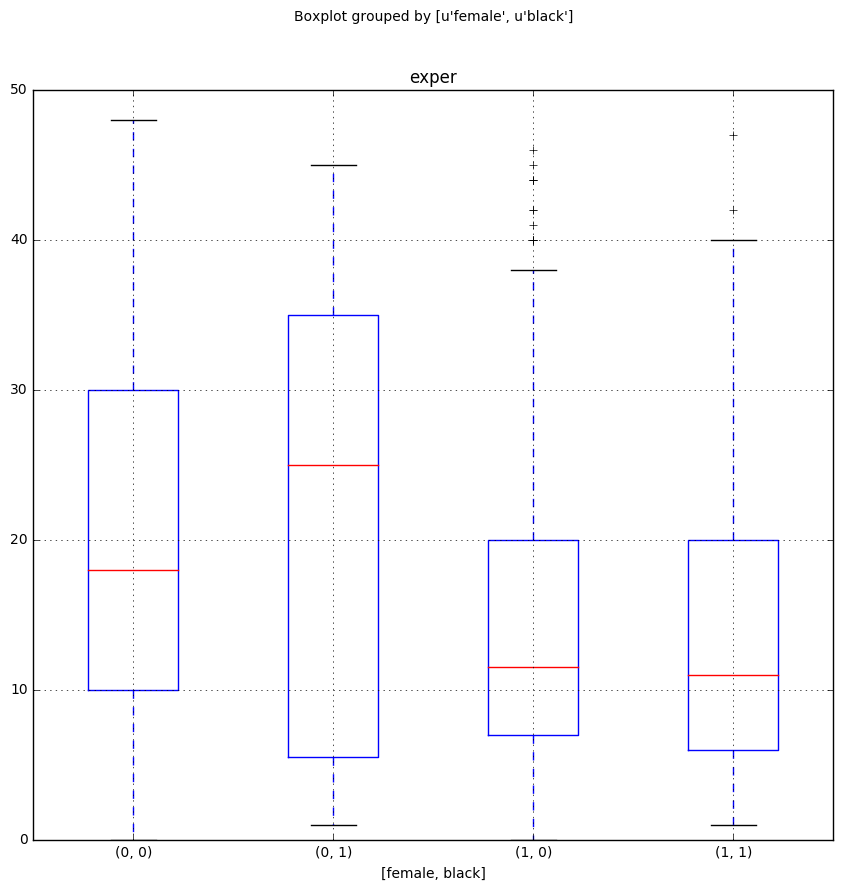

In [40]:
df.boxplot(column='exper',  by=['female', 'black'], 
           figsize=(10,10))
plt.show()